In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df=pd.read_csv('/content/OLX_Car_Data_CSV.csv.zip', encoding='latin1')

In [139]:
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             22836 non-null  object 
 1   Condition         22837 non-null  object 
 2   Fuel              22528 non-null  object 
 3   KMs Driven        22687 non-null  float64
 4   Model             22525 non-null  object 
 5   Price             24973 non-null  int64  
 6   Registered City   20337 non-null  object 
 7   Transaction Type  22528 non-null  object 
 8   Year              22689 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


.

.

**Remove Duplicates:**

In [141]:
df.duplicated().sum()

np.int64(3774)

In [142]:
df.duplicated().mean()*100

np.float64(15.112321307011573)

In [143]:
df = df.drop_duplicates()

In [144]:
df.shape

(21199, 9)

.

.

**Remove Null rows:**

<Axes: >

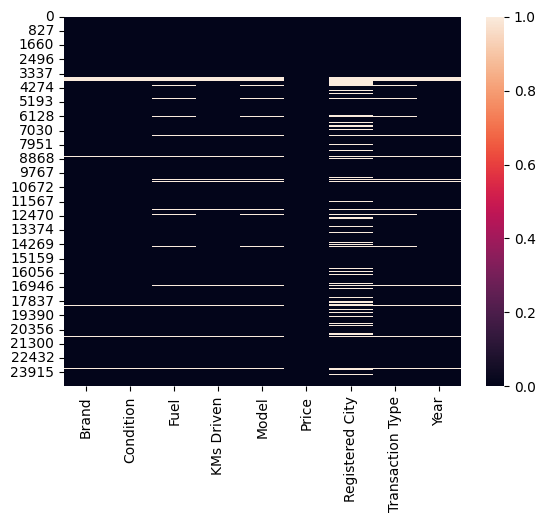

In [145]:
sns.heatmap(df.isnull())

In [146]:
df.isna().mean()*100

,0
Brand,2.047266
Condition,2.042549
Fuel,3.297325
KMs Driven,2.575593
Model,3.311477
Price,0.000000
Registered City,12.925138
Transaction Type,3.297325
Year,2.566159


In [147]:
df.isna().sum()

,0
Brand,434
Condition,433
Fuel,699
KMs Driven,546
Model,702
Price,0
Registered City,2740
Transaction Type,699
Year,544


In [148]:
df = df.dropna(axis=0, thresh=df.shape[1] * 0.6)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20500 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             20500 non-null  object 
 1   Condition         20500 non-null  object 
 2   Fuel              20500 non-null  object 
 3   KMs Driven        20500 non-null  float64
 4   Model             20497 non-null  object 
 5   Price             20500 non-null  int64  
 6   Registered City   18459 non-null  object 
 7   Transaction Type  20500 non-null  object 
 8   Year              20500 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.6+ MB


In [150]:
df['Model'].nunique()

303

.


.


**Clean Model Column:**

In [151]:
df[df['Model'].isna()]

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
1059,Suzuki,Used,CNG,222200.0,NaN,220000,Karachi,Cash,1994.0
2838,Honda,Used,Petrol,98800.0,NaN,1230000,Karachi,Cash,2009.0
3046,KIA,Used,CNG,95000.0,NaN,225000,Karachi,Cash,2001.0


In [152]:
df['Model']=df['Model'].fillna('Unknown')

In [153]:
df[df['Model'].isna()]

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year


.

.

**Clean Registered City Column:**

In [154]:
df['Registered City'].nunique()

61

In [155]:
df['Registered City'].unique()

array(['Karachi', 'Hyderabad', 'Bagh', 'Sukkar', 'Bahawalnagar', 'Lahore',
       'Askoley', 'Khanpur', 'Quetta', 'Karak', 'Islamabad', 'Sialkot',
       'Pakpattan', 'Lasbela', 'Sukkur', 'Rawalpindi', 'Bahawalpur',
       'Ali Masjid', 'Multan', nan, 'Khaplu', 'Tank', 'Badin',
       'Rahimyar Khan', 'Chilas', 'Kasur', 'Khushab', 'Vehari', 'Chitral',
       'Khanewal', 'Attock', 'Larkana', 'Bela', 'Khairpur', 'Kandhura',
       'Abbottabad', 'Nawabshah', 'Bhimber', 'Mardan', 'Chiniot',
       'Faisalabad', 'Sahiwal', 'Haripur', 'Peshawar', 'Kohat',
       'Sargodha', 'Jhelum', 'Gujrat', 'Nowshera', 'Gujranwala', 'Mirpur',
       'Burewala', 'Mandi Bahauddin', 'Muzaffargarh', 'Wah',
       'Dera Ghazi Khan', 'Sheikhüpura', 'Okara', 'Dera Ismail Khan',
       'Swat', 'Swabi', 'Muzaffarabad'], dtype=object)

In [156]:
df['Registered City'].isna().sum()

np.int64(2041)

In [157]:
df['Registered City']=df['Registered City'].fillna('unknown')

.

.

**Reset Index:**

In [158]:
df.reset_index(drop=True, inplace=True)

.

.

**Column Spread:**

In [159]:
df.std(numeric_only=True)

,0
KMs Driven,6.151447e+05
Price,1.474873e+06
Year,9.588701e+00


In [160]:
(df.std(numeric_only=True) / df.mean(numeric_only=True)) * 100

,0
KMs Driven,468.999322
Price,159.571529
Year,0.478039


In [161]:
df.var(numeric_only=True)

,0
KMs Driven,3.784030e+11
Price,2.175252e+12
Year,9.194319e+01


**Corelation:**

In [162]:
df.corr(numeric_only=True)

,KMs Driven,Price,Year
KMs Driven,1.000000,-0.039409,-0.118915
Price,-0.039409,1.000000,0.276312
Year,-0.118915,0.276312,1.000000


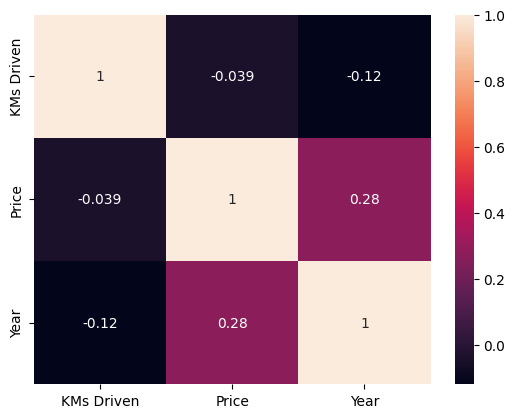

In [163]:
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

.

.

**Remove Outlier:**

df['KMs Driven']

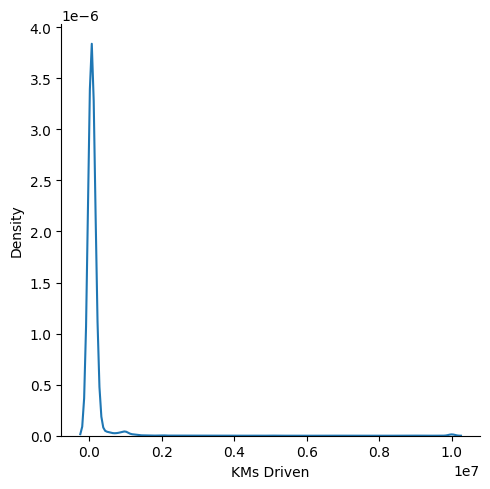

In [164]:
sns.displot(df['KMs Driven'], kind='kde')
plt.show()

<Axes: xlabel='KMs Driven'>

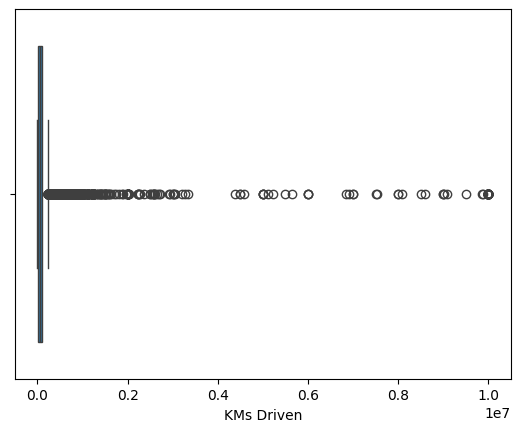

In [165]:
sns.boxplot(x='KMs Driven', data=df)

In [166]:
percentil25=df['KMs Driven'].quantile(0.25)
percentil75=df['KMs Driven'].quantile(0.75)
print(percentil25,percentil75)

17000.0 100000.0


In [167]:
QRT2=percentil75-percentil25
print(QRT2)

83000.0


In [168]:
 upper_limitt=percentil75+1.5*QRT2
 lower_limitt=percentil25-1.5*QRT2
 print(upper_limitt,lower_limitt)

224500.0 -107500.0


In [169]:
df['KMs Driven']=np.where(df['KMs Driven']>upper_limitt,upper_limitt,np.where(df['KMs Driven']<lower_limitt,lower_limitt,df['KMs Driven']))

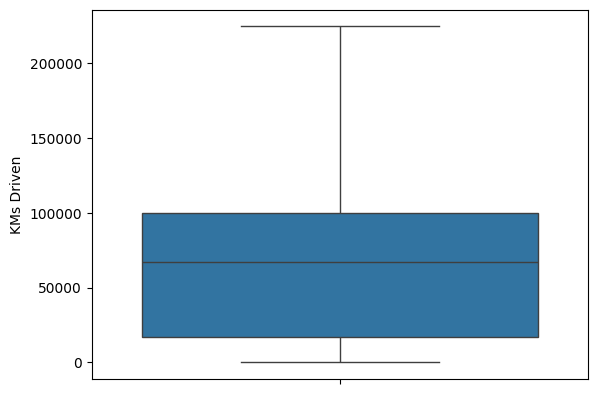

In [170]:
sns.boxplot(df['KMs Driven'])
plt.show()

df['Price']

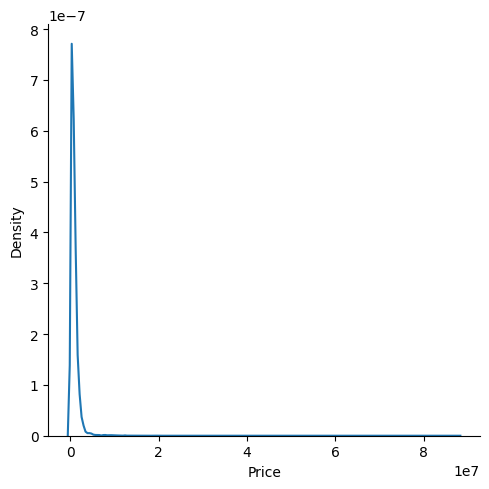

In [171]:
sns.displot(df['Price'],kind='kde')
plt.show()

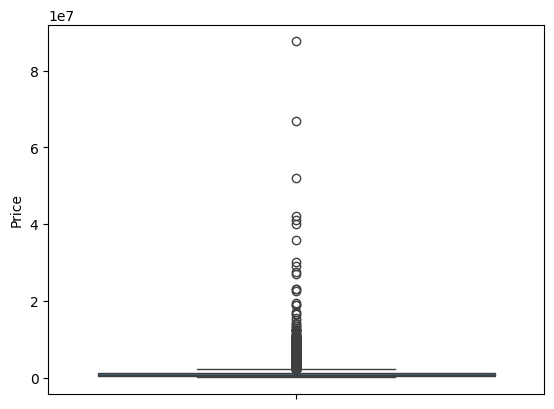

In [172]:
sns.boxplot(df['Price'])
plt.show()

In [173]:
percentil225=df['Price'].quantile(0.25)
percentil275=df['Price'].quantile(0.75)
print(percentil225,percentil275)

380000.0 1150000.0


In [174]:
QRT=percentil75-percentil25
print(QRT)

83000.0


In [175]:
 upper_limit=percentil275+1.5*QRT
 lower_limit=percentil225-1.5*QRT
 print(upper_limit,lower_limit)

1274500.0 255500.0


In [176]:
df['Price']=np.where(df['Price']>upper_limit,upper_limit,np.where(df['Price']<lower_limit,lower_limit,df['Price']))

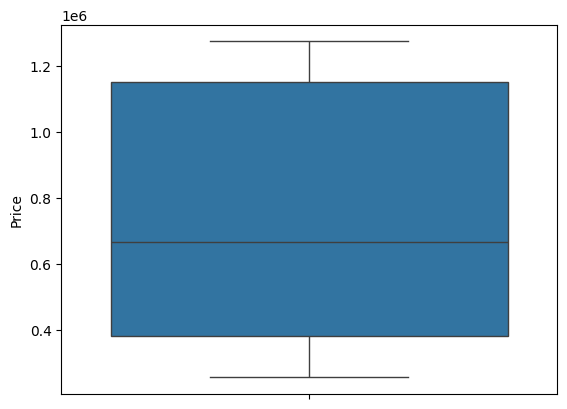

In [177]:
sns.boxplot(df['Price'])
plt.show()

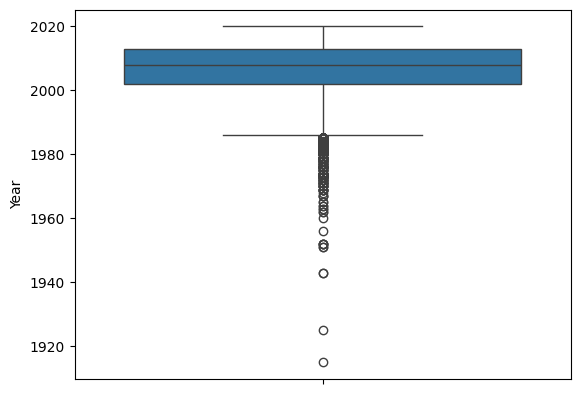

In [178]:
sns.boxplot(df['Year'])
plt.show()

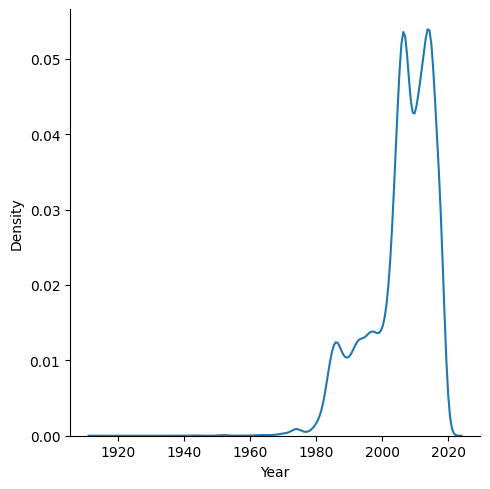

In [179]:
sns.displot(df['Year'],kind='kde')
plt.show()

In [180]:
percent=df['Year'].quantile(0.25)
percen=df['Year'].quantile(0.75)
print(percent,percen)

2002.0 2013.0


In [181]:
QRT3=percen-percent
print(QRT3)

11.0


In [182]:
 upper_limit3=percentil375+1.5*QRT3
 lower_limit3=percentil325-1.5*QRT3
 print(upper_limit3,lower_limit3)

2029.5 1985.5


In [187]:
df['Year']=np.where(df['Year']>upper_limit3,upper_limit3,np.where(df['Year']<lower_limit3,lower_limit3,df['Year']))

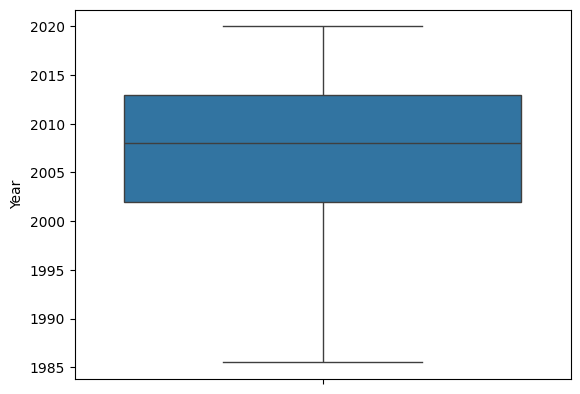

In [189]:
sns.boxplot(df['Year'])
plt.show()

.

.

**Most Popular Models:**

In [186]:
import plotly.express as px
fig = px.treemap(df, path=['Model'], title='Most Popular Models')
fig.show()

.

.

**Relationship between Year and Price:**

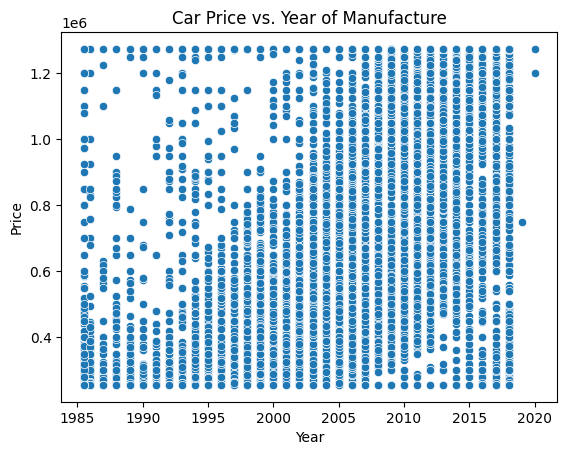

In [191]:
sns.scatterplot(x='Year', y='Price', data=df)
plt.title('Car Price vs. Year of Manufacture')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

.

.

**Relationship between KMs Driven and Price:**

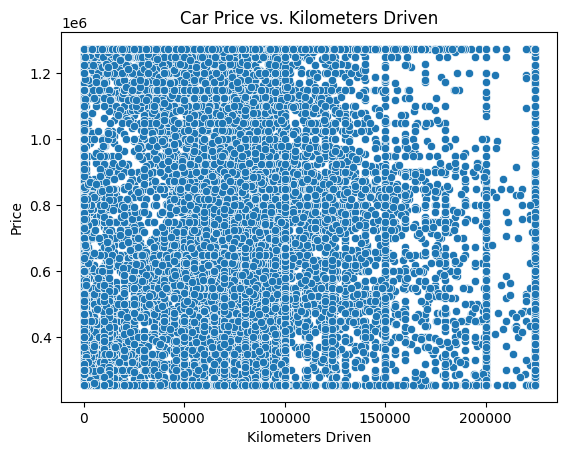

In [192]:
sns.scatterplot(x='KMs Driven', y='Price', data=df)
plt.title('Car Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

**Average Price by Brand:**

In [193]:
avg_price_by_brand = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
print(avg_price_by_brand.head())

Brand
Lexus          1.133150e+06
Toyota         1.056001e+06
Porsche        1.037250e+06
Range Rover    1.037083e+06
BMW            1.026500e+06
Name: Price, dtype: float64


**Top 10 expensive and Top 10 affordable brands:**

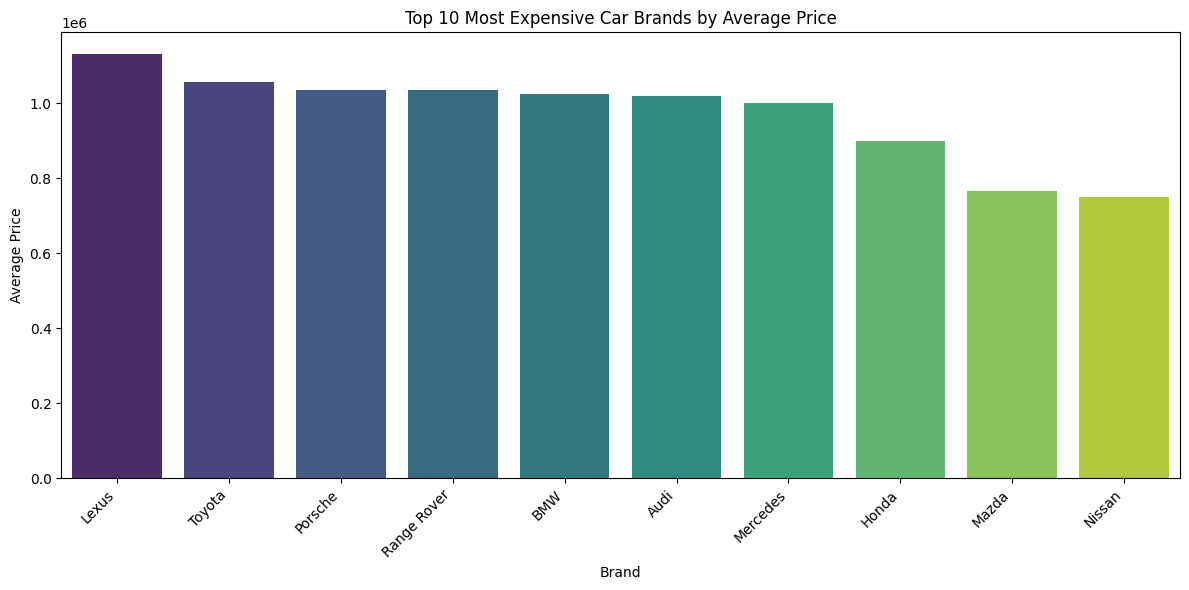

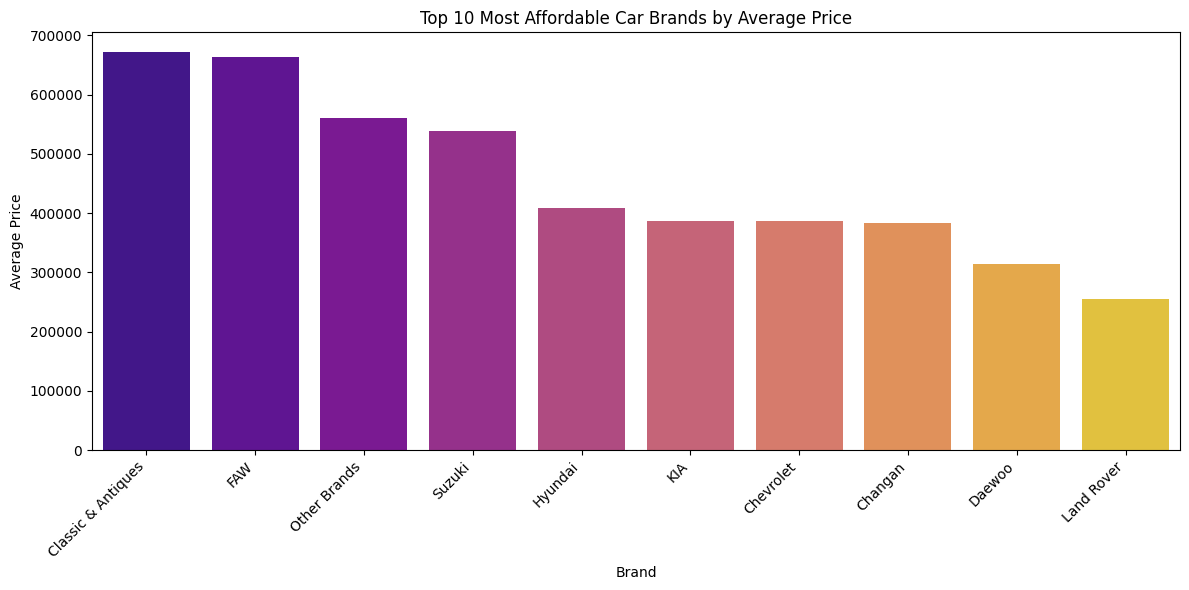

In [195]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_brand.head(10).index, y=avg_price_by_brand.head(10).values, palette='viridis', hue=avg_price_by_brand.head(10).index, legend=False)
plt.title('Top 10 Most Expensive Car Brands by Average Price')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_by_brand.tail(10).index, y=avg_price_by_brand.tail(10).values, palette='plasma', hue=avg_price_by_brand.tail(10).index, legend=False)
plt.title('Top 10 Most Affordable Car Brands by Average Price')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

.

.

**Correlation between Fuel types and Price:**

In [201]:
avg_price_by_fuel = df.groupby('Fuel')['Price'].mean().sort_values(ascending=False)
print(avg_price_by_fuel)

Fuel
Diesel    981703.325359
Hybrid    941918.377854
Petrol    857893.568661
CNG       434018.871445
LPG       354964.285714
Name: Price, dtype: float64


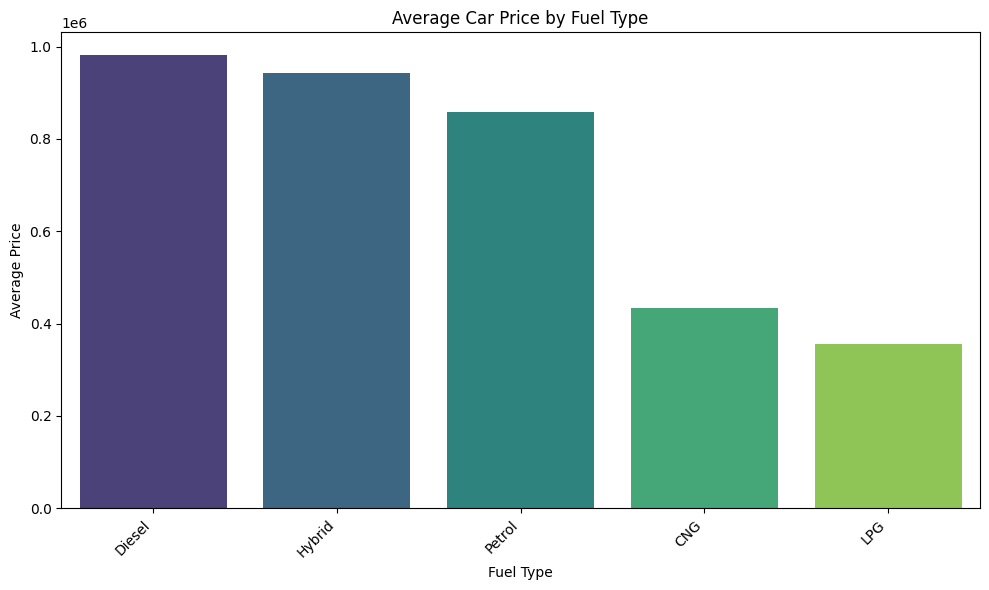

In [197]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_fuel.index, y=avg_price_by_fuel.values, palette='viridis', hue=avg_price_by_fuel.index, legend=False)
plt.title('Average Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

.

.

**price variation based on the Condition:**

In [198]:
avg_price_by_condition = df.groupby('Condition')['Price'].mean().sort_values(ascending=False)
print(avg_price_by_condition)

Condition
New     929206.918378
Used    688998.551795
Name: Price, dtype: float64


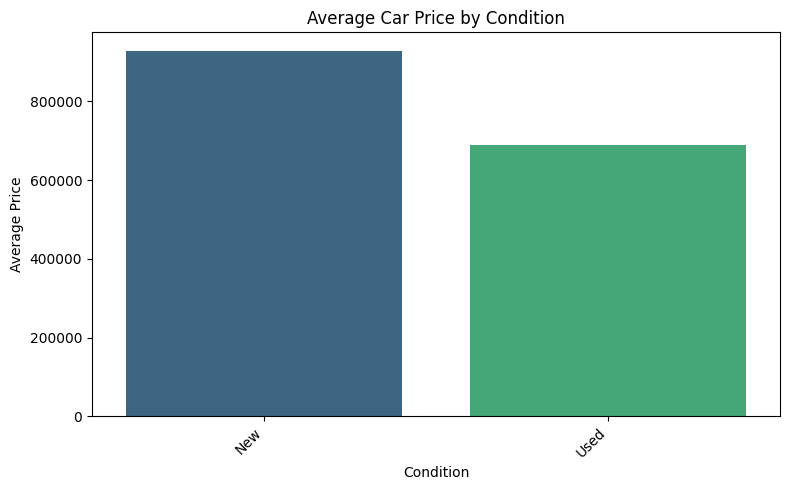

In [199]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_condition.index, y=avg_price_by_condition.values, palette='viridis', hue=avg_price_by_condition.index, legend=False)
plt.title('Average Car Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()